In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#!/bin/bash
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
student-performance-factors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
with zipfile.ZipFile('student-performance-factors.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

In [5]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [6]:
# How big is dataset?
df.shape

(6607, 20)

In [7]:
# How does data look like?
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
df.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2740,22,91,Medium,Medium,Yes,8,64,Medium,Yes,1,Low,High,Public,Positive,3,Yes,High School,Moderate,Male,68
2359,22,61,High,Medium,No,5,63,Low,Yes,1,Low,Medium,Public,Positive,3,No,Postgraduate,Near,Male,64
6296,14,74,High,Medium,No,8,100,Medium,Yes,1,Low,Medium,Public,Neutral,3,No,College,Near,Male,66
147,12,96,Low,High,Yes,8,62,Medium,Yes,2,Medium,High,Public,Negative,3,No,College,Near,Female,68
3762,15,66,Medium,Medium,No,6,90,Low,Yes,2,Medium,Medium,Public,Negative,3,No,College,Far,Female,62


In [9]:
# What is the type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [10]:
# Any missing values?
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [11]:
# How data looks mathematically?
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [12]:
# How is correlation?
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

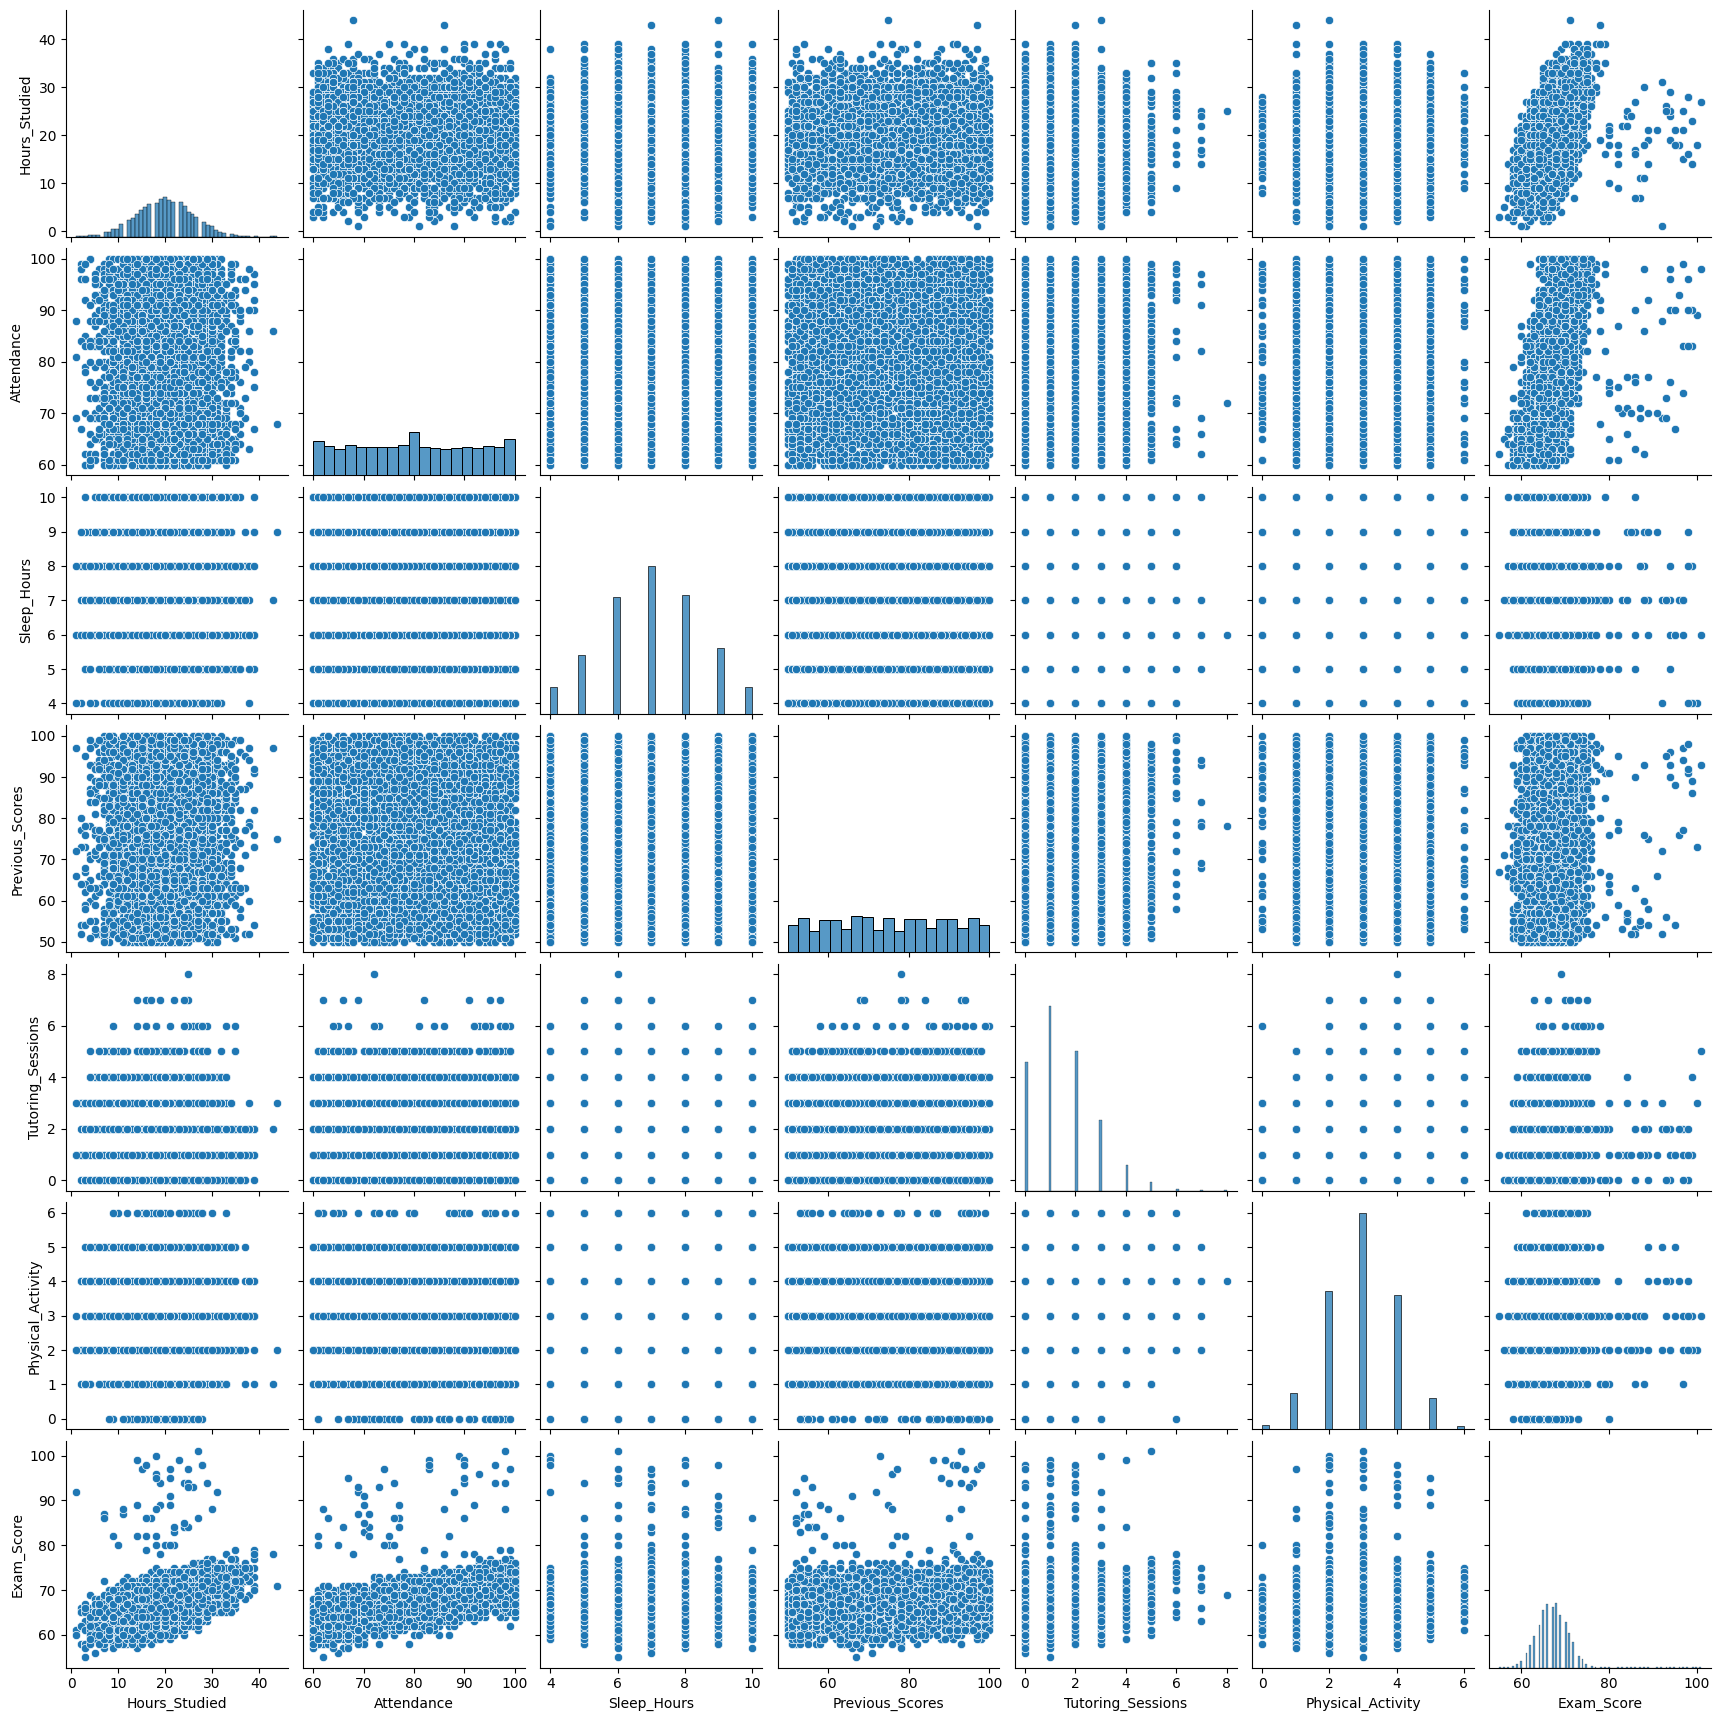

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'Parental_Involvement':
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Value counts for 'Access_to_Resources':
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Value counts for 'Extracurricular_Activities':
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Value counts for 'Motivation_Level':
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Value counts for 'Internet_Access':
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Value counts for 'Family_Income':
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Value counts for 'Teacher_Quality':
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

Value counts for 'School_Type':
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Value counts for 'Peer_Influence

In [15]:
# Step 1 -> train/test/split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Exam_Score']), df['Exam_Score'], test_size=0.2, random_state=42)

In [16]:
X_train.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5810,27,79,Low,High,Yes,8,63,High,Yes,2,Low,Medium,Public,Negative,5,No,College,Moderate,Female
1268,16,86,High,Medium,Yes,7,94,Medium,Yes,2,Low,High,Public,Neutral,3,No,High School,Moderate,Female
414,22,87,Low,Medium,No,8,83,Low,Yes,1,Low,Medium,Public,Neutral,1,No,College,Far,Male
4745,18,100,High,Medium,Yes,10,86,Medium,Yes,1,Medium,Medium,Public,Neutral,3,No,High School,Near,Male
654,35,78,High,Low,Yes,10,99,Medium,Yes,1,Low,Medium,Private,Positive,2,No,High School,Near,Male


In [17]:
X_train.shape

(5285, 19)

In [18]:
ordinal_categories = [['Low', 'Medium', 'High'],
 ['Low', 'Medium', 'High'],
  ['Low', 'Medium', 'High'],
   ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
     ['Negative', 'Neutral', 'Positive'],
      ['High School', 'College', 'Postgraduate'],
       ['Far', 'Moderate', 'Near', 'Unknown'] ]

In [19]:
preprocessor = ColumnTransformer([

    ('ord', Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OrdinalEncoder(
            categories=ordinal_categories,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ))
    ]), [2,3,7,10,11,13,16,17]),

    ('nom', Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
            drop='first'
        ))
    ]), [4,8,12,15,18]),

    ('num', Pipeline(steps=[
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ]), [0,1,5,6,9,14])
])

In [20]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('select', SelectKBest(score_func=f_regression, k=8)),
    ('model', LinearRegression())
])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Negative',
                                                                                               'Neutral',
                                                                                               'Positive'],
                                                                                              ['High '
                                                                                               'School',
                                                                                               'Coll...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [4, 8, 12, 15, 18]),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 5, 6, 9, 14])])),
                ('select',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x788c23663ce0>)),
                ('model', LinearRegression())])

In [22]:
pipe.named_steps

{'preprocessor': ColumnTransformer(transformers=[('ord',
                                  Pipeline(steps=[('impute',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('encode',
                                                   OrdinalEncoder(categories=[['Low',
                                                                               'Medium',
                                                                               'High'],
                                                                              ['Low',
                                                                               'Medium',
                                                                               'High'],
                                                                              ['Low',
                                                                               'Medium',
                           

In [23]:
# Get feature names from preprocessor
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

# Get mask of selected features
mask = pipe.named_steps['select'].get_support()

# Apply mask to feature names
selected_features = feature_names[mask]
print("Selected features:", selected_features)

Selected features: ['ord__Parental_Involvement' 'ord__Access_to_Resources'
 'ord__Peer_Influence' 'ord__Parental_Education_Level'
 'num__Hours_Studied' 'num__Attendance' 'num__Previous_Scores'
 'num__Tutoring_Sessions']


In [24]:
pipe.named_steps['preprocessor'].transform(X_train).shape

(5285, 19)

In [25]:
pipe.named_steps['preprocessor'].transformers_[0][1][0].statistics_

array(['Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Positive',
       'High School', 'Near'], dtype=object)

In [26]:
y_pred = pipe.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
y_pred = pipe.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 3.902336467355117
R²: 0.7239252593296753


In [29]:
import joblib

# Save the trained pipeline
joblib.dump(pipe, "model.pkl")


['model.pkl']